In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('movies_cleaned.csv', encoding = 'latin1')
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year  
0    8.1        Wil Wheaton  299174   Stephen King  1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   int64  
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   int64  
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 799.3+ KB


In [4]:
df['released'] = pd.to_datetime(df.released)
df['released']

0      1986-08-22
1      1986-06-11
2      1986-05-16
3      1986-07-18
4      1986-08-01
          ...    
6815   2016-07-22
6816   2016-05-06
6817   2016-07-25
6818   2016-12-02
6819   2017-07-28
Name: released, Length: 6820, dtype: datetime64[ns]

Changing the 'released' feature into datetime format.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   int64         
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   int64         
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
 14  year      6820 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 799.3+ KB


In [6]:
df['score'].describe()

count    6820.000000
mean        6.374897
std         1.003142
min         1.500000
25%         5.800000
50%         6.400000
75%         7.100000
max         9.300000
Name: score, dtype: float64

#### Movie Genre and Score Plot

No handles with labels found to put in legend.


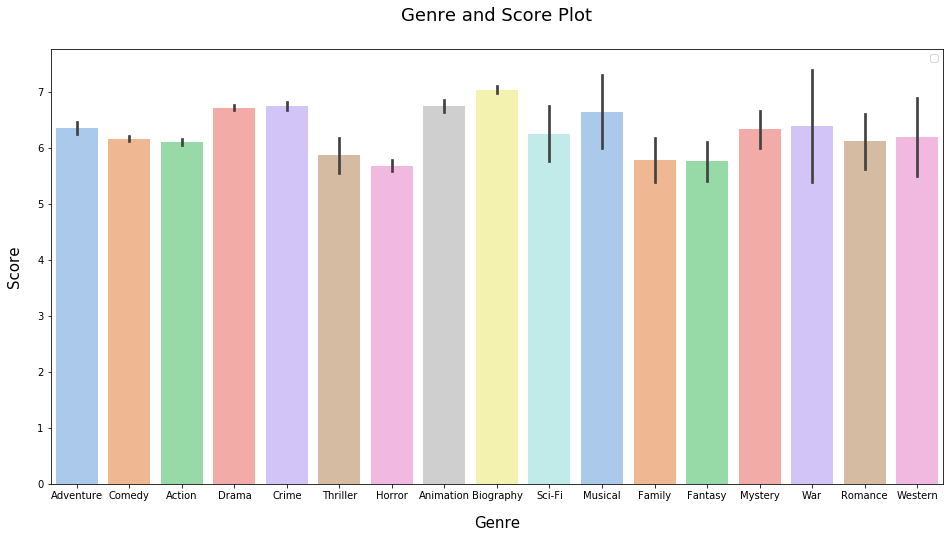

In [7]:
plt.figure(figsize = (16, 8))
sns.barplot(data = df, x = 'genre', y ='score', palette = 'pastel')
plt.title('Genre and Score Plot', fontsize=18, y=1.05)
plt.xlabel('Genre', fontsize=15, labelpad=15)
plt.ylabel('Score', fontsize=15, labelpad=15)
plt.legend()
# plt.savefig('genre_score.png')

The plot above suggests that genres with considerably highest scores are Biography, Crime, and Drama. While the lowest scores are Horror, Fantasy, and Family.

#### Movies based on Genre Count

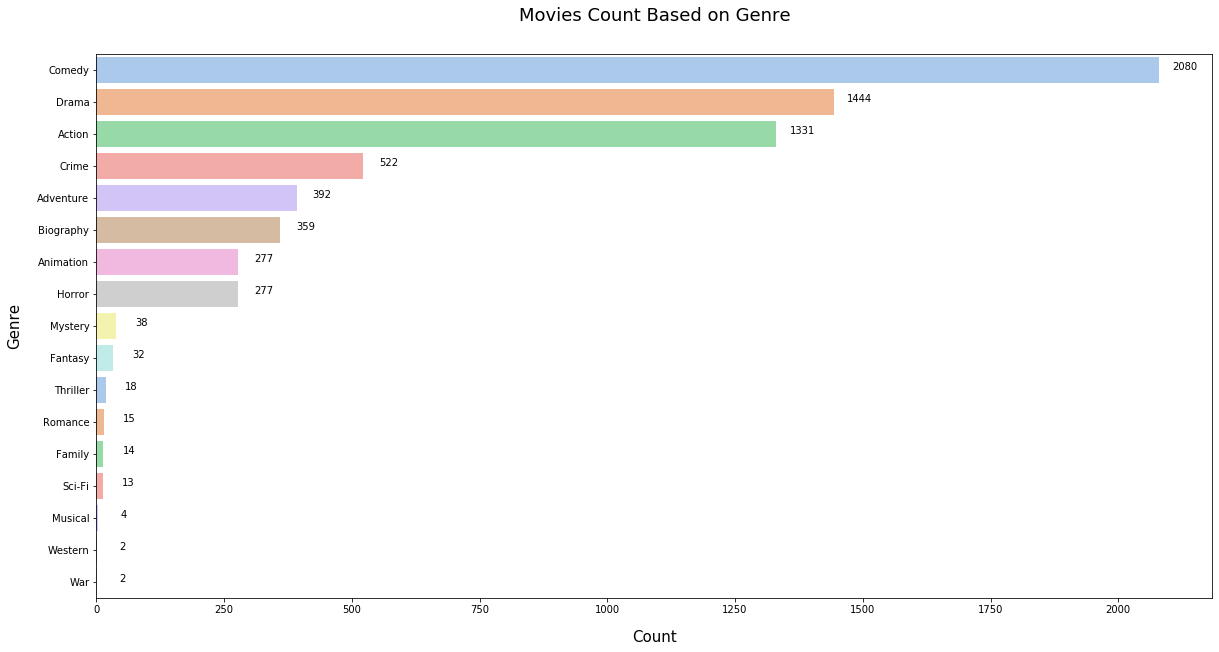

In [8]:
plt.figure(figsize=(20,10))
axis = sns.countplot(palette = 'pastel', y='genre',data=df,order = df['genre'].value_counts().index)
plt.title('Movies Count Based on Genre', fontsize=18, y=1.05)
plt.xlabel('Count', fontsize=15, labelpad=15)
plt.ylabel('Genre', fontsize=15, labelpad=15)

for p in axis.patches:
    width = p.get_width()
    axis.text(width+50, p.get_y()+p.get_height()/2,width ,ha='center')
# plt.savefig('genrecount.png')

From the visualization above, we can see that movies from the dataset are dominated by three genres, by far. Those genres are: Comedy, Drama, and Action

#### Movies Based on Country Produced Count

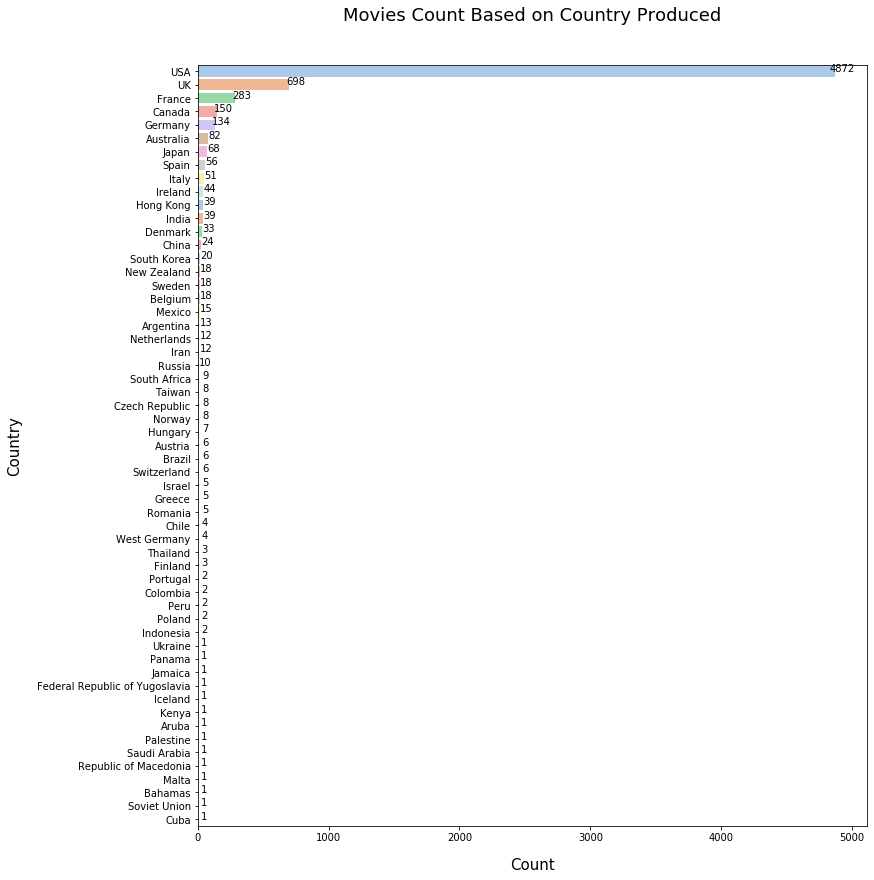

In [9]:
plt.figure(figsize=(12,14))
axis = sns.countplot(palette = 'pastel', y='country',data=df,order = df['country'].value_counts().index)
plt.title('Movies Count Based on Country Produced', fontsize=18, y=1.05)
plt.xlabel('Count', fontsize=15, labelpad=15)
plt.ylabel('Country', fontsize=15, labelpad=15)

for p in axis.patches:
    width = p.get_width()
    axis.text(width+50, p.get_y()+p.get_height()/2,width ,ha='center')
    
# plt.savefig('countryproduced.png')

The plot above shows that most movies that are available on the IMDb dataset are dominated with USA-produced movies, followed by United Kingdom and France, respectively.

#### Movies' Gross Revenue Based on Genre

In [10]:
df_gg = df[['gross','genre']].sort_values(by = 'gross', ascending=False)

Text(0, 0.5, 'Genre')

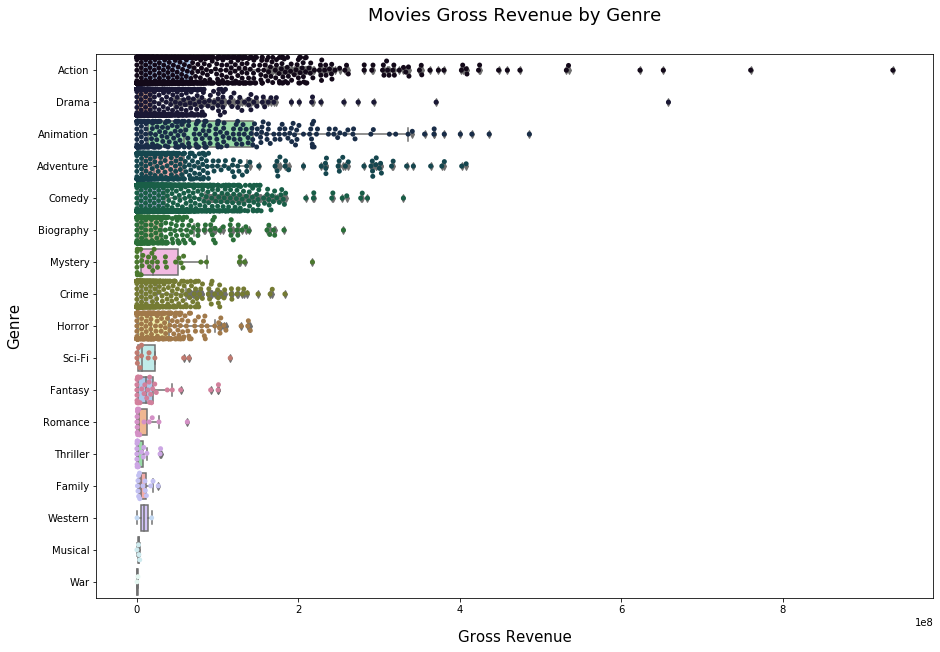

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_gg, x='gross', y='genre', palette = 'pastel')
sns.swarmplot(data=df_gg, x='gross', y='genre', palette = 'cubehelix')
plt.title('Movies Gross Revenue by Genre', fontsize=18, y=1.05)
plt.xlabel('Gross Revenue', fontsize=15, labelpad=15)
plt.ylabel('Genre', fontsize=15, labelpad=15)
# plt.savefig('grossgenre.png')

Based on the plot above, movies with Action, Adventure, Comedy, Drama, and Animation genres lead the other genre based on gross revenues gained.

#### Movies Count Based on Rating

****Movies Rating****
- Rated G: General audiences – All ages admitted
- Rated PG: Parental guidance suggested – Some material may not be suitable for children.
- Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
- Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
- Rated NC-17: Adults Only – No one 17 and under admitted.

taken from https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system

- TV-Y: This program is aimed at a very young audience, including children from ages 2–6.
- TV-Y7: This program is designed for children age 7 and above.
- TV-Y7: Some programs may be given the "FV" content descriptor if they exhibit more 'fantasy violence', and/or are generally more intense or combative than other programs rated TV-Y7.
- TV-G: Most parents would find this program suitable for all ages.
- TV-PG:Parental guidance is recommended; these programs may be unsuitable for younger children.
- TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.
- TV-MA: This program is intended to be viewed by adults and therefore may be unsuitable for children under 17.

taken from https://en.wikipedia.org/wiki/Television_content_rating_system

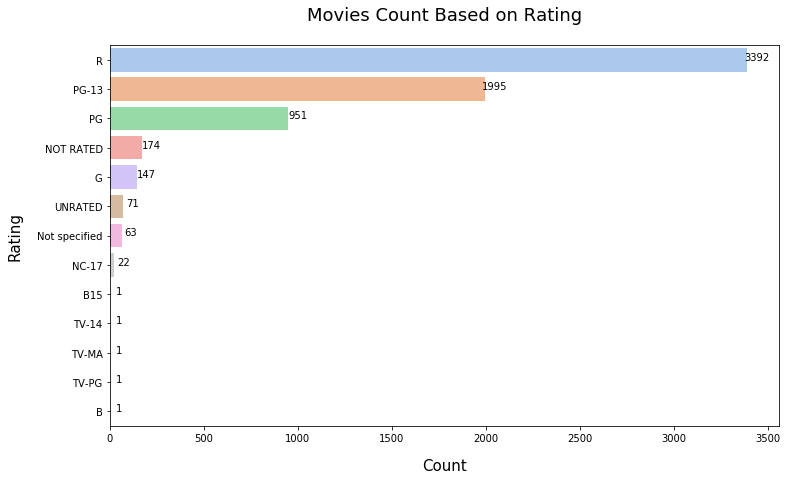

In [12]:
plt.figure(figsize=(12,7))
axis = sns.countplot(y='rating',data=df,order = df['rating'].value_counts().index, palette = 'pastel')
plt.title('Movies Count Based on Rating', fontsize=18, y=1.05)
plt.xlabel('Count', fontsize=15, labelpad=15)
plt.ylabel('Rating', fontsize=15, labelpad=15)

for p in axis.patches:
    width = p.get_width()
    axis.text(width+50, p.get_y()+p.get_height()/2,width ,ha='center')
# plt.savefig('rating.png')

Based on the rating system (United States), movies with R, PG-13, and PG are dominating the others with considerably huge margins.

#### Number of Movies Produced by Year

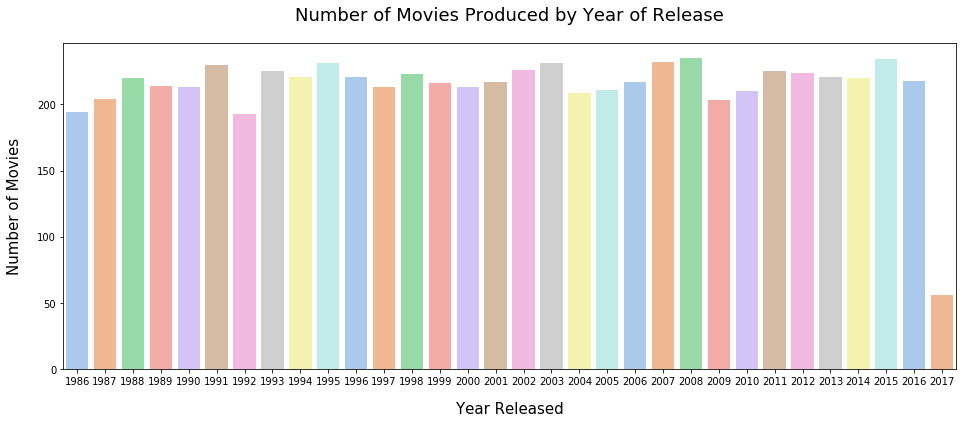

In [13]:
plt.figure(figsize=(16,6))
s = sns.countplot(x = 'year', data = df, palette = 'pastel')
plt.title('Number of Movies Produced by Year of Release', fontsize=18, y=1.05)
plt.xlabel('Year Released', fontsize=15, labelpad=15)
plt.ylabel('Number of Movies', fontsize=15, labelpad=15)
# plt.savefig('yearreleased.png')
plt.show()

Based on the visualization above, the movies that are available in this dataset are mostly released on 2008, 2015, and 2007. with above 230 number of movie titles.

#### Top 10 Movie Stars Based on Movie Appearances

In [14]:
df_star = df['star'].value_counts()[:10].index
df_star

Index(['Nicolas Cage', 'Robert De Niro', 'Denzel Washington', 'Tom Hanks',
       'Bruce Willis', 'Johnny Depp', 'Ben Stiller', 'Tom Cruise',
       'Adam Sandler', 'John Cusack'],
      dtype='object')

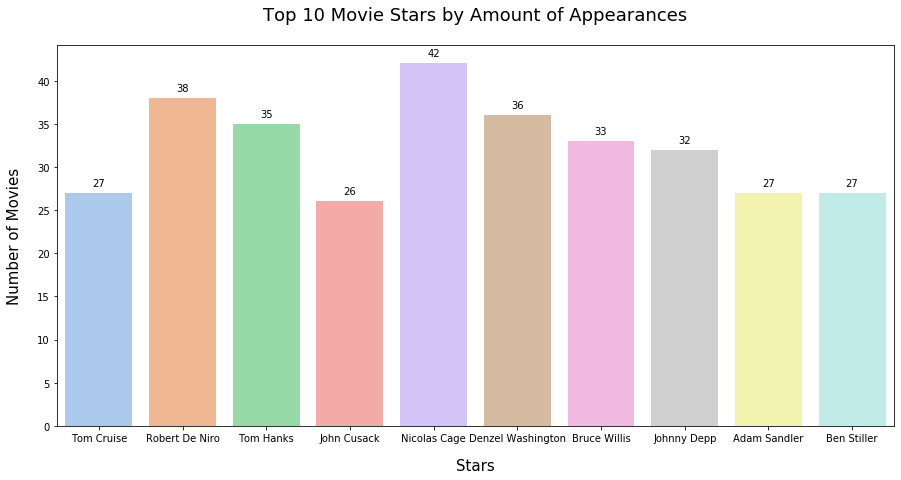

In [15]:
top10star = df.copy()[(df['star'] == 'Nicolas Cage') | (df['star'] == 'Robert De Niro') | 
                      (df['star'] == 'Denzel Washington') | (df['star'] == 'Tom Hanks') | 
                      (df['star'] == 'Bruce Willis') | (df['star'] == 'Johnny Depp') | (df['star'] == 'Ben Stiller') |
                      (df['star'] == 'Tom Cruise') |  (df['star'] == 'Adam Sandler') | (df['star'] == 'John Cusack')]

plt.figure(figsize=(15,7))
s = sns.countplot(palette = 'pastel', x = 'star', data = top10star)
for p in s.patches:
    s.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Top 10 Movie Stars by Amount of Appearances', fontsize=18, y=1.05)
plt.xlabel('Stars', fontsize=15, labelpad=15)
plt.ylabel('Number of Movies', fontsize=15, labelpad=15)
plt.show()
# plt.savefig('stars.png')

In [16]:
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
fig = px.pie(top10star, names='star')
fig.update_traces(textinfo='value', textfont_size=20, marker_colors=night_colors)
fig.show()

According to the visualization above, the top 10 Actors by their number of appearances are Nicolas Cage, Robert De Niro, Denzel Washington, Tom Hanks, Bruce Willis, Johnny Depp, Tom Cruise, Ben Stiller, Adam Sandler, and John Cusack. I find it pretty interesting that all of them are actors, not a single actress.

#### Top 10 Movie Directors Based on Number of Movies Made

In [17]:
topdir = df['director'].value_counts()[:10].index
topdir

Index(['Woody Allen', 'Clint Eastwood', 'Steven Soderbergh',
       'Steven Spielberg', 'Ron Howard', 'Joel Schumacher', 'Ridley Scott',
       'Spike Lee', 'Barry Levinson', 'Stephen Frears'],
      dtype='object')

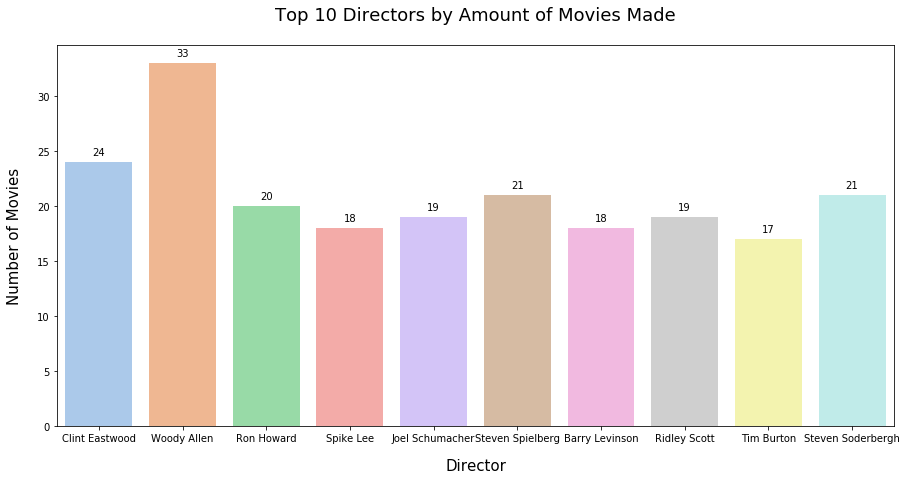

In [18]:
top10dir = df.copy()[(df['director'] == 'Woody Allen') | (df['director'] == 'Clint Eastwood') | 
                     (df['director'] == 'Steven Spielberg') | (df['director'] == 'Steven Soderbergh') | 
                     (df['director'] == 'Ron Howard') | (df['director'] == 'Ridley Scott') | 
                     (df['director'] == 'Joel Schumacher') | (df['director'] == 'Barry Levinson') | 
                     (df['director'] == 'Spike Lee') | (df['director'] == 'Tim Burton') ]

plt.figure(figsize=(15,7))
s = sns.countplot(palette = 'pastel', x = 'director', data = top10dir)
for p in s.patches:
    s.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Top 10 Directors by Amount of Movies Made', fontsize=18, y=1.05)
plt.xlabel('Director', fontsize=15, labelpad=15)
plt.ylabel('Number of Movies', fontsize=15, labelpad=15)
plt.show()
# plt.savefig('directors.png')


In [19]:
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
fig = px.pie(top10dir, names='director')
fig.update_traces(textinfo='value', textfont_size=20, marker_colors=irises_colors)
fig.show()

Based on the plot above, we can see that the top 5 most common directors are Woody Allen, Clint Eastwood, Steven Spielberg, Steven Soderbergh, and Ron Howard. Once again, this list are dominated by male directors, there is not a single female director on this list.

#### Movies Runtime Distribution

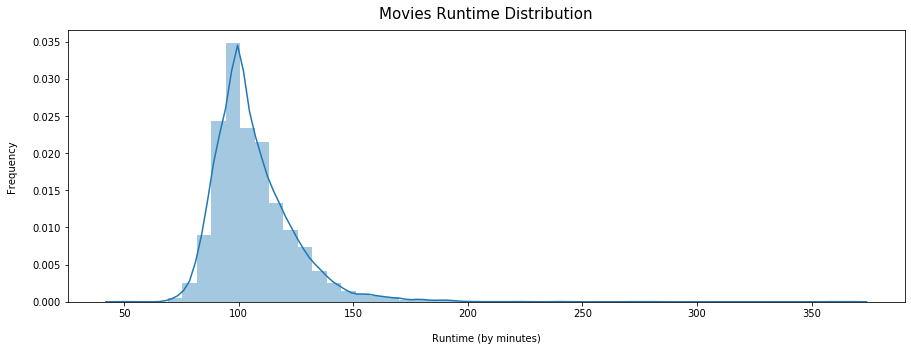

In [20]:
plt.figure(figsize=(15,5))

sns.distplot(df['runtime'])
plt.title('Movies Runtime Distribution', fontsize=15, y=1.02)
plt.xlabel('Runtime (by minutes)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.show()
# plt.savefig('duration.png')

Based on the histogram above, 100 minutes runtime of movies are the most common found on this dataset.

#### Movies Gross Revenue by Company Production

In [21]:
df_gc = df[['gross','company']].sort_values(by = 'gross', ascending=False)[:20]

Text(0, 0.5, 'Production Company')

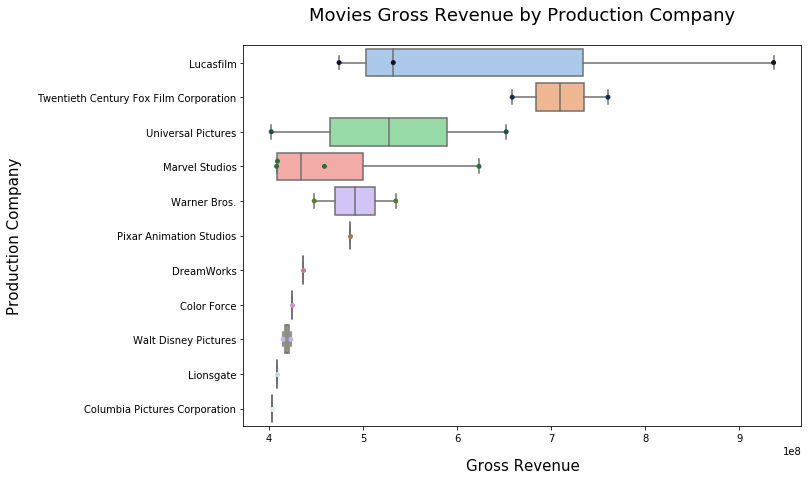

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(palette = 'pastel', data=df_gc, x='gross', y='company' )
sns.swarmplot(data=df_gc, x='gross', y='company', palette = 'cubehelix')
plt.title('Movies Gross Revenue by Production Company', fontsize=18, y=1.05)
plt.xlabel('Gross Revenue', fontsize=15, labelpad=15)
plt.ylabel('Production Company', fontsize=15, labelpad=15)
# plt.savefig('grosscompany.png')

Production Companies that gained the most gross revenue are Lucasfilm, 20th Century Fox, Universal Pictures, Marvel Studios, and Warner Bros.

#### Movies with the Most Budget

In [23]:
df_bn = df[['budget','name']].sort_values(by = 'budget', ascending=False)[:20]

Text(0, 0.5, 'Movie Titles')

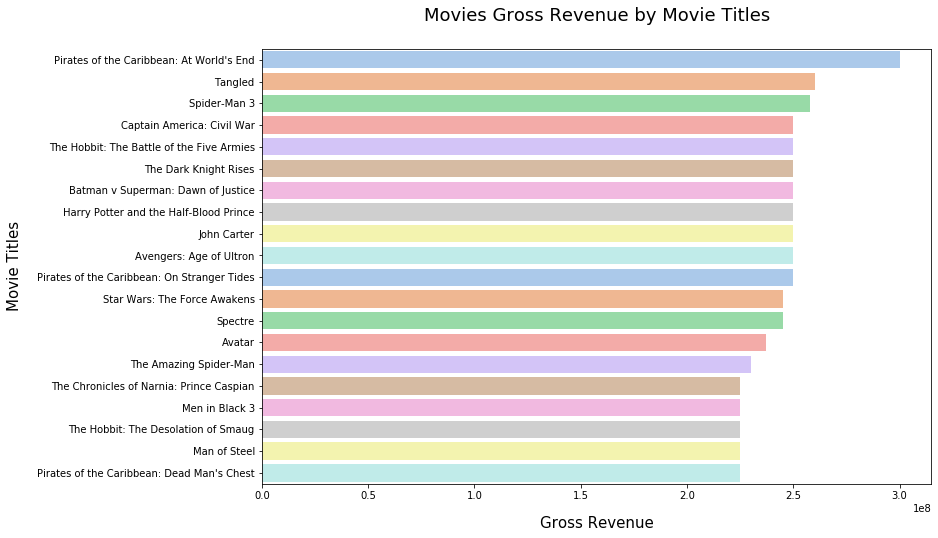

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_bn, x='budget', y='name', palette = 'pastel')
plt.title('Movies Gross Revenue by Movie Titles', fontsize=18, y=1.05)
plt.xlabel('Gross Revenue', fontsize=15, labelpad=15)
plt.ylabel('Movie Titles', fontsize=15, labelpad=15)
# plt.savefig('grossname.png')

The plot above shows the top 20 movies with the most budget.

#### Movies Gross Revenue based on Movie Stars

In [25]:
df_bs = df[['budget','star']].sort_values(by = 'budget', ascending=False)[:20]

Text(0, 0.5, 'Stars')

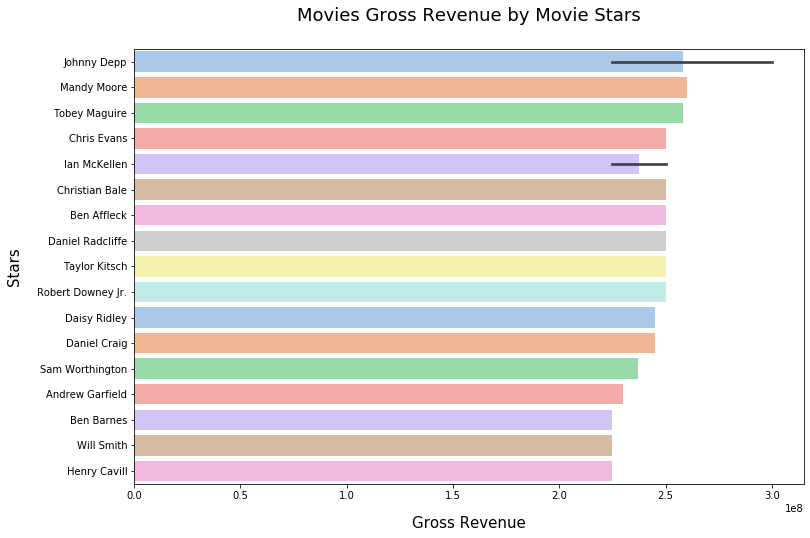

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_bs, x='budget', y='star', palette = 'pastel')
plt.title('Movies Gross Revenue by Movie Stars', fontsize=18, y=1.05)
plt.xlabel('Gross Revenue', fontsize=15, labelpad=15)
plt.ylabel('Stars', fontsize=15, labelpad=15)
# plt.savefig('gross_stars.png')

Based on the visualization above, we can see that movies starred by Johnny Depp, Mandy Moore, Tobey Maguire, Chris Evans, and Ian McKellen are the top 5. This visualization is pretty similar to the previous visualization, where I was exploring the top 20 movies based on gross revenue. 

#### Correlation between features

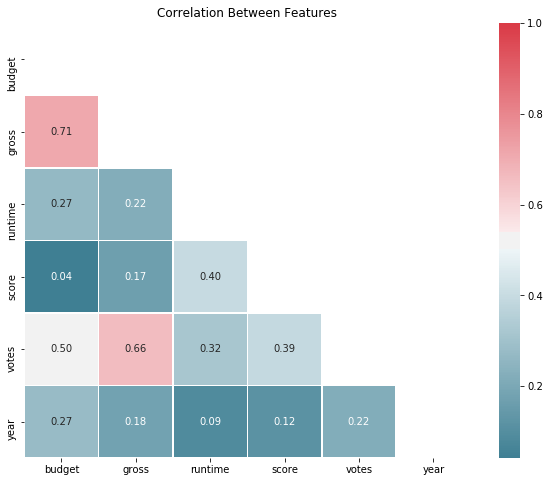

In [27]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Correlation Between Features')
plt.show()
# plt.savefig('corr.png')

From the visualization above, the correlation between gross and budget features is the highest with 0.71. It is because I think the higher the budget for the movies, the gross revenue of the movies could also be high, and vice versa. The second highest correlation score is between votes and gross features. I suggest it is because votes mean that people have watched the movies. By that perspective, it could mean that the production companies gained their gross revenue from the people who have watched the movies.

#### Budget and gross revenue

In [28]:
fig = px.scatter(df, x="budget", y="gross",
                 size='budget', hover_data=['gross'], title='Budget and Gross',
)
fig.show()

From the visualization above, we can see that movies that grossed over 600 million USD are only those who have the minimum of about 150 million USD budget. Other than that, I can see that movies with higher budget is inversely proportional to the amount of the movies.

#### Budget and gross revenue by genre

In [29]:
fig = px.scatter(df, x="budget", y="gross", color="genre",
                 size='budget', hover_data=['name'], title='Budget and Gross by Genre')
fig.show()

From this plot, I want to show a similar plot as the previous one. The difference is that this plot also shows budget and gross by their genre. Movies who have big budget tend to have Action, Adventure, or Animation as their genre.

In [33]:
fig = px.scatter(df, x="votes", y="score",
                 size='votes', hover_data=['score'], title='Votes and Score Scatter Plot',
)
fig.show()

The plot above shows that movies with the bigger number of votes have tendencies to gain bigger score.